In [ ]:
from google.colab import files
uploaded = files.upload()


Saving face_mask_dataset.zip to face_mask_dataset.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("face_mask_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("face_mask_dataset")


In [ ]:
os.listdir('face_mask_dataset')
# Output should be: ['with_mask', 'without_mask']


['with_mask', '.ipynb_checkpoints', 'without_mask']

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
dataset_path = 'face_mask_dataset'
img_height, img_width = 150, 150
batch_size = 32


In [ ]:
import shutil

shutil.rmtree("face_mask_dataset/.ipynb_checkpoints", ignore_errors=True)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    'face_mask_dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    'face_mask_dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 2760 images belonging to 2 classes.
Found 689 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),  # Additionol Dropout layer added here
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.4964 - loss: 0.8507 - val_accuracy: 0.6967 - val_loss: 0.6335
Epoch 2/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.6314 - loss: 0.6002 - val_accuracy: 0.8287 - val_loss: 0.4591
Epoch 3/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8836 - loss: 0.3150 - val_accuracy: 0.6923 - val_loss: 0.5633
Epoch 4/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9339 - loss: 0.1779 - val_accuracy: 0.7692 - val_loss: 0.5439
Epoch 5/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9432 - loss: 0.1508 - val_accuracy: 0.9057 - val_loss: 0.3804
Epoch 6/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9550 - loss: 0.1260 - val_accuracy: 0.8824 - val_loss: 0.4203
Epoch 7/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9614 - loss: 0.1042 - val_accuracy: 0.9274 - val_loss: 0.2802
Epoch 8/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9757 - loss: 0.0744 - val_accuracy: 0.8287 - v

In [ ]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.2f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.2f}")



Final Training Accuracy: 0.98
Final Validation Accuracy: 0.93


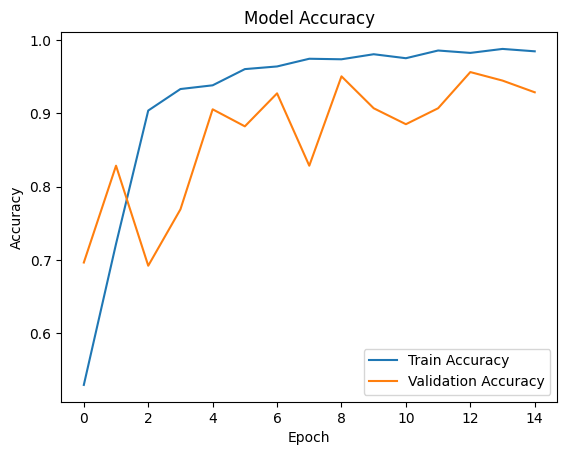

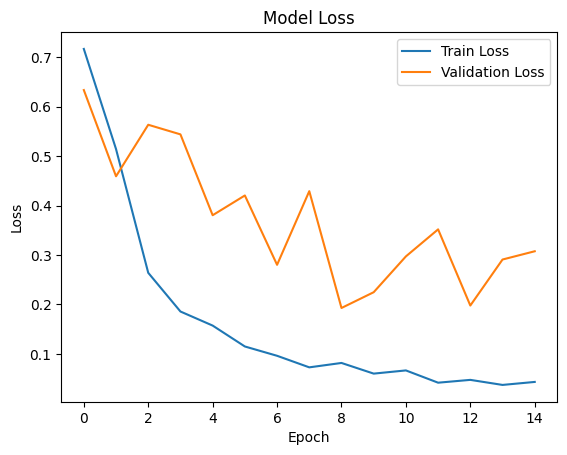

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("face_mask_model.keras")



In [ ]:
from google.colab import files
files.download("face_mask_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test_image46.jpg to test_image46.jpg
Saving test_image45.jpg to test_image45.jpg
Saving test_image44.jpg to test_image44.jpg
Saving test_image43.jpg to test_image43.jpg
Saving test_image42.jpg to test_image42.jpg
Saving test_image41.jpg to test_image41.jpg
Saving test_image40.jpg to test_image40.jpg
Saving test_image39.jpg to test_image39.jpg


In [ ]:
from keras.models import load_model
model = load_model('face_mask_model.keras')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img = image.load_img('test_image42.jpg', target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalizing
img_array = np.expand_dims(img_array, axis=0)  # batch dimension


In [ ]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

class_names = ['with_mask', 'without_mask']
print("Prediction:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: with_mask


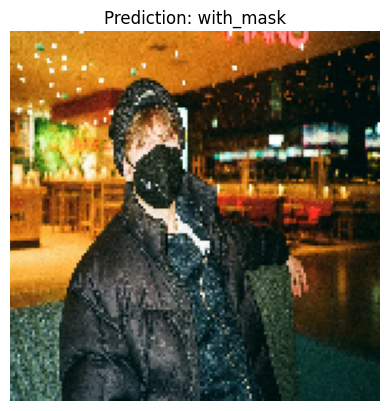

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Prediction: {class_names[predicted_class]}")
plt.axis('off')
plt.show()
